# Exercise 2: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Plotting the data

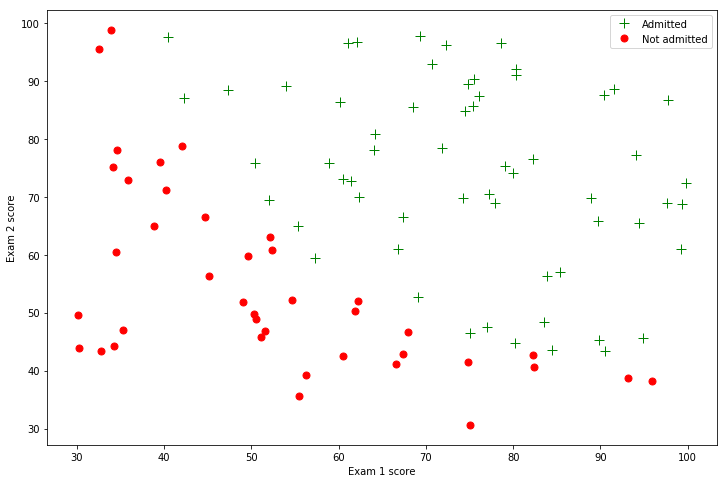

In [2]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',', usecols=(0, 1, 2), unpack=True)
data = data.T
X = data[:,0:2]
X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
Y = data[:,2]
pos = data[Y == 1]
neg = data[Y == 0]

plt.figure(figsize=(12,8))
points_pos, = plt.plot(pos[:, 0], pos[:, 1], 'g+', markersize=10, label="Admitted")
points_neg, = plt.plot(neg[:, 0], neg[:, 1], 'ro', markersize=7, label="Not admitted")
plt.legend(handles=[points_pos, points_neg])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

## 2. Sigmoid Function

In [3]:
def sigmoid(vec):
    return 1/(1 + np.exp(-vec))

## 3. Cost Function

In [4]:
def h(theta, vec):
    return sigmoid(np.dot(vec, theta.T))

def cost_function(theta, X, Y):
    return float((np.sum(-np.dot(Y, np.log(h(theta, X)))) - np.dot((1-Y), np.log(1-h(theta, X))))/
                 Y.shape[0])

theta = np.zeros((1, 3))
print "Cost function output with theta=[0, 0]:", cost_function(theta, X, Y)

Cost function output with theta=[0, 0]: 0.69314718056


## 4. Gradient

In [5]:
def gradient(theta, X, Y):
    gradient = np.dot((h(theta, X) - Y), X)/Y.shape[0]
    return gradient

## 5. Optimization

In [16]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(X, Y))
optimal_theta = np.array([result[0]])
print "Cost using optimal theta:", cost_function(optimal_theta, X, Y)

Cost using optimal theta: 0.203497701589


## 6. Prediction

In [15]:
def predict(theta, input):
    return h(theta, input)[0]

# predict probability with which a student with Exam1 score of 45, and Exam2 score of 85 will be admitted
print predict(optimal_theta, np.array([1, 45, 85]))

0.776290625351


## 7. Plot the Decision Boundary

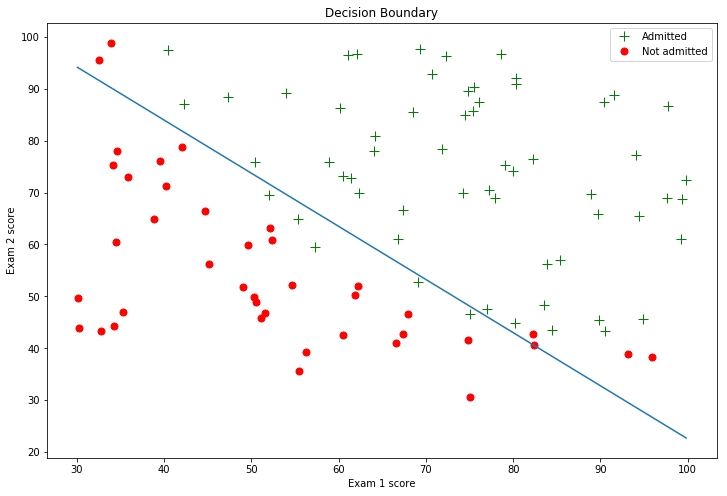

In [41]:
plt.figure(figsize=(12,8))
points_pos, = plt.plot(pos[:, 0], pos[:, 1], 'g+', markersize=10, label="Admitted")
points_neg, = plt.plot(neg[:, 0], neg[:, 1], 'ro', markersize=7, label="Not admitted")
minX = np.min(X[:, 1])
maxX = np.max(X[:, 1])
plot_x = np.array([[minX, maxX]])
plot_y = np.multiply( -1/optimal_theta[0,2], optimal_theta[0,1]*plot_x + optimal_theta[0,0]).T
plot_x = plot_x.T
plt.plot(plot_x, plot_y, clip_path=None)
plt.legend(handles=[points_pos, points_neg])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Decision Boundary')
plt.show()